In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=[21,32,45,65,22,32,12,31,76,87]
y=[1,2,3,4,5,34,23,12,13,17]

In [3]:
import numpy as np
data=list(zip(x,y))
print(data)
x=np.array(data)
print(x)

[(21, 1), (32, 2), (45, 3), (65, 4), (22, 5), (32, 34), (12, 23), (31, 12), (76, 13), (87, 17)]
[[21  1]
 [32  2]
 [45  3]
 [65  4]
 [22  5]
 [32 34]
 [12 23]
 [31 12]
 [76 13]
 [87 17]]


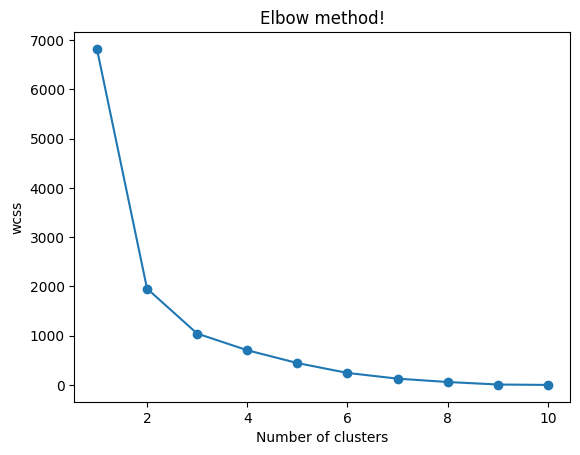

In [4]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',max_iter=20,n_init=20,random_state=0)
  model.fit(x)
  wcss.append(model.inertia_)
plt.plot(range(1,11), wcss,marker='o')
plt.title('Elbow method!')
plt.xlabel('Number of clusters')
plt.ylabel("wcss")
plt.show()

In [6]:
#Train with optimal number of clusters=3
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=30,random_state=0)

#Make predictions
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 1 2 0 0 2 1 1]


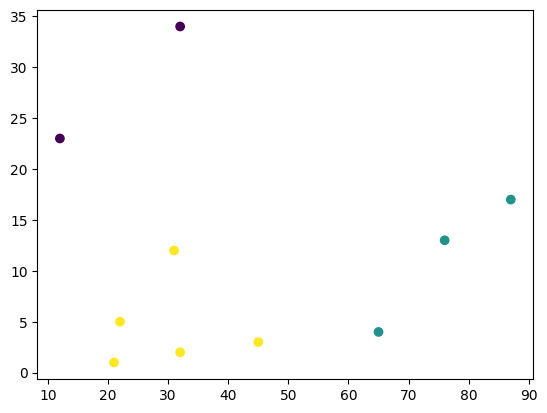

In [ ]:
#Plot

plt.scatter(x[:,0],x[:,1],c=y_kmeans)
plt.show()

**Applying Kmeans to Mall dataset**

In [7]:
#Load dataset
dataset=pd.read_csv("/content/mall.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.shape

(200, 5)

In [10]:
#Get required fields annual income and spending score
x=dataset.iloc[:,[3,4]].values

In [11]:
#Apply kmeans
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


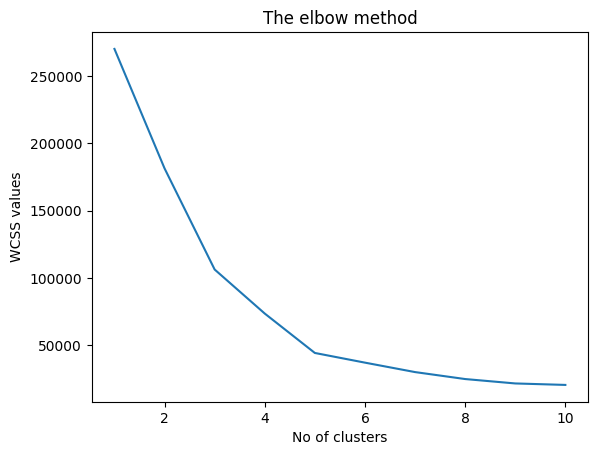

In [12]:
#Plot elbow curve
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

In [13]:
#Training with optimal cluster number
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [14]:
#Prediction
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

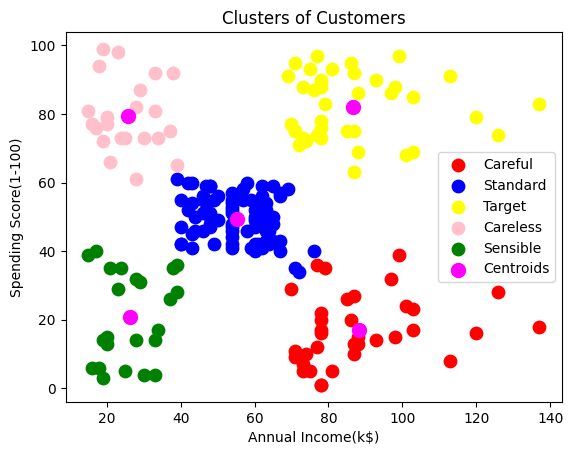

In [16]:
#Plot for 5 clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c='red',label='Careful')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c='blue',label='Standard')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c='yellow',label='Target')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c='pink',label='Careless')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c='green',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()



```
# This is formatted as code
```


**Kmeans on bank dataset**

In [75]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


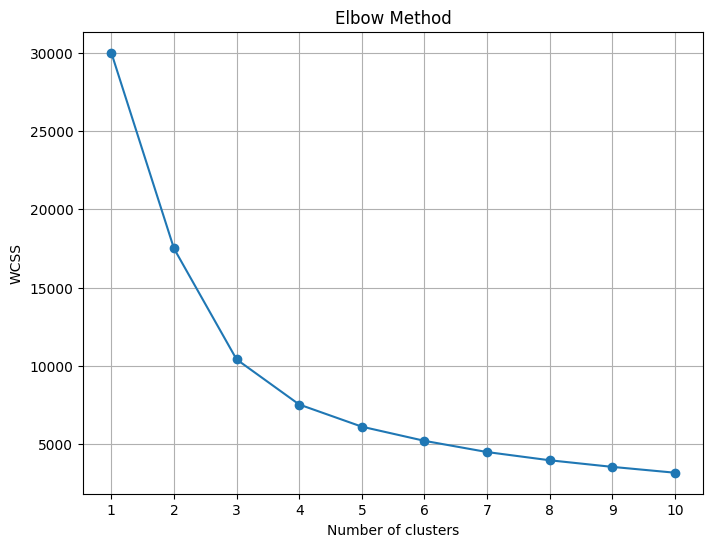

(10000, 2)

In [76]:
#Load dataset
dataset = pd.read_csv("/content/Bank_data.csv")
dataset=dataset.iloc[:,3:]
dataset= pd.get_dummies(dataset, columns=['Geography','Gender'], drop_first=True)

#Apply standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset=sc.fit_transform(dataset)

#Apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(dataset)


# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
x_pca.shape

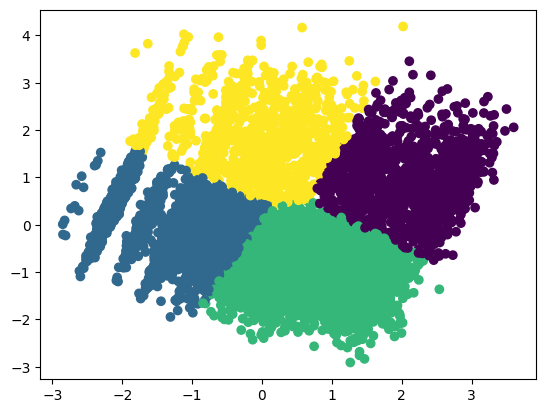

In [77]:
#Plot
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=200,n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(x_pca)
plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans.labels_)
plt.show()

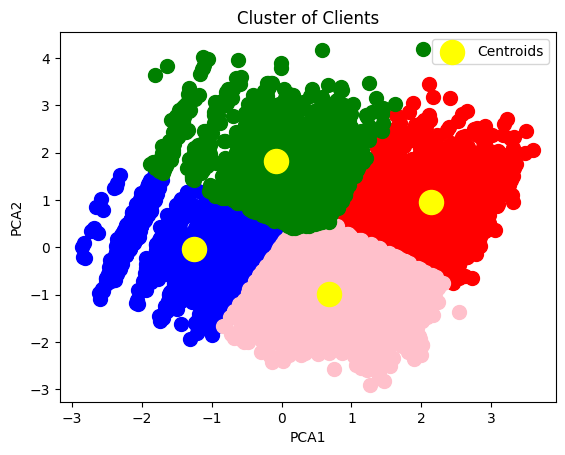

In [78]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',)
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='pink')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=100,c='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

**Iris dataset**

In [79]:
from sklearn.datasets import load_iris


In [80]:
iris=load_iris()

In [81]:
x=iris.data


In [82]:
#Apply stanardization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

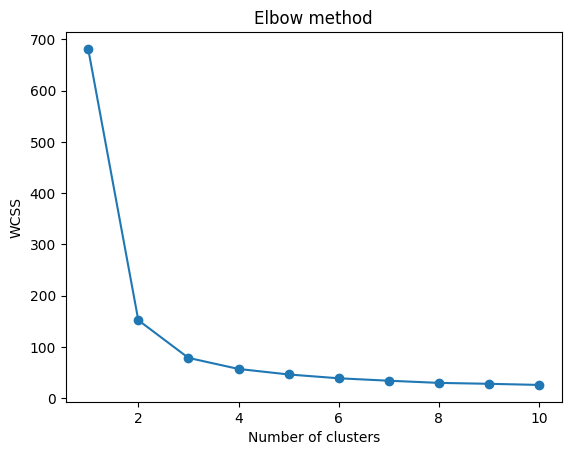

In [83]:
#Apply kmeans
import matplotlib.pyplot as plt

WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


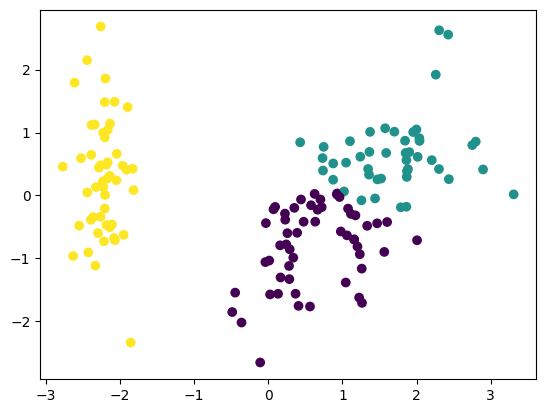

In [84]:
#Plot
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(x_pca)
plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans.labels_)
plt.show()

In [85]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

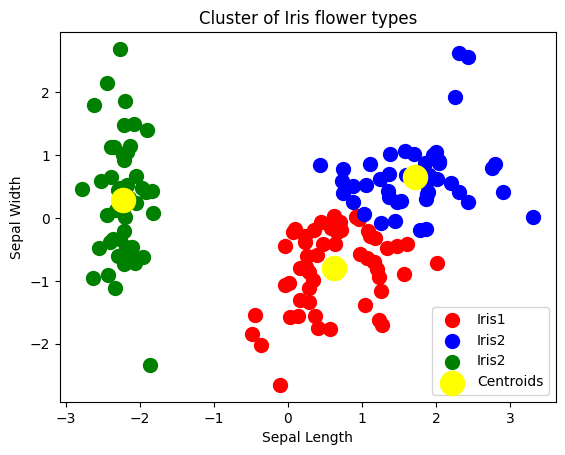

In [87]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',label='Iris1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue',label='Iris2')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='green',label='Iris2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Iris flower types')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()